https://stackoverflow.com/questions/6697259/interactive-matplotlib-plot-with-two-sliders?rq=3

In [1]:
import scipy as sc
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import warnings 

In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# Black-Scholes Model

In [3]:
def BlackScholesCall(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [4]:
def BlackScholesPut(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [5]:
# https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model

def BS_CALLDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return S*np.exp(-q*T) * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)


In [6]:
# https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model

def BS_PUTDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)

In [7]:
def BlackScholesDCashCall(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(d2)

In [8]:
def BlackScholesDCashPut(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-d2)


In [9]:
def BlackScholesDAssetCall(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1)

In [10]:
def BlackScholesDAssetPut(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(-d1)

# Bachelier Model

In [11]:
def BachelierCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (S-K)*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c)

In [12]:
def BachelierPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (K-S)*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c) 

In [13]:
def BachelierDCashCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return norm.cdf(c)

In [14]:
def BachelierDCashPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return norm.cdf(-c)

In [15]:
def BachelierDAssetCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return S*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c)

In [16]:
def BachelierDAssetPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return S*norm.cdf(-c) - sigma*S*np.sqrt(T)*norm.pdf(-c)

# Black76 Model

In [17]:
def Black76Call(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F*norm.cdf(c1) - K*norm.cdf(c2))

In [18]:
def Black76Put(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(K*norm.cdf(-c2) - F*norm.cdf(-c1))

In [19]:
def Black76DCashCall(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(c2)

In [20]:
def Black76DCashPut(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(-c2)

In [21]:
def Black76DAssetCall(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    #c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return F*disc*norm.cdf(c1)

In [22]:
def Black76DAssetPut(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    #c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return F*disc*norm.cdf(-c1)

# Displaced-Diffusion Model

In [23]:
def DisplacedDiffusionCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F + K)*norm.cdf(c2))

In [24]:
def DisplacedDiffusionPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(((1-beta)/beta*F + K)*norm.cdf(-c2) - F/beta*norm.cdf(-c1))

In [25]:
def DisplacedDiffusionDCashCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(c2)

In [26]:
def DisplacedDiffusionDCashPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(-c2)

In [27]:
def DisplacedDiffusionDAssetCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F)*norm.cdf(c2))

In [28]:
def DisplacedDiffusionDAssetPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(-c1) - ((1-beta)/beta*F)*norm.cdf(-c2))

# Greeks
# All the formulas here need to be thorougly checked

https://medium.com/@SSiddhant/implementing-black-scholes-model-for-option-chains-using-python-6978662bfbb6

^The python formulas here for the Greeks have errors

In [29]:
def delta_call(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.cdf(d1)

In [30]:
def gamma_call(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    return numerator / denominator

In [31]:
def vega_call(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.pdf(d1) * np.sqrt(T)

In [32]:
#https://www.geeksforgeeks.org/python-pow-function/

def theta_call(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = S * norm.pdf(d1) * sigma
    denominator = 2 * np.sqrt(T)
    return -1 * (numerator / denominator) - r * K * pow(np.exp(1), -1 * r * T) * norm.cdf(d2)

In [33]:
#https://www.geeksforgeeks.org/python-pow-function/

def rho_call(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K * T * pow(np.exp(1), -1 * r * T) * norm.cdf(d2)

In [34]:
def delta_put(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.cdf(d1) - 1

In [35]:
def gamma_put(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    return numerator / denominator

In [36]:
def vega_put(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.pdf(d1) * np.sqrt(T)

In [37]:
def theta_put(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = S * norm.pdf(d1) * sigma
    denominator = 2 * np.sqrt(T)
    return -1 * (numerator / denominator) + r * K * pow(np.exp(1), -1 * r * T) * norm.cdf(-1 * d2)


In [38]:
def rho_put(K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -1 * K * T * pow(np.exp(1), -1 * r * T) * norm.cdf(-1 * d2)

# Initial Parameters

In [39]:
S = np.arange(0, 200, 1)     # Underlying asset price
K=100                        # Option strike price
r=0.05                       # Risk-free interest rate
sigma=0.2                    # Volatility of the underlying asset
T=1                          # Time to expiration in years
beta=0.5                     # Beta for Displaced-Diffusion Model

# Black-Scholes Model / Black76 Model

In [40]:
def BlackScholesPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, r, sigma, T), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 100])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val))
        fig.canvas.draw_idle()
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Add a set of radio buttons for changing color
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

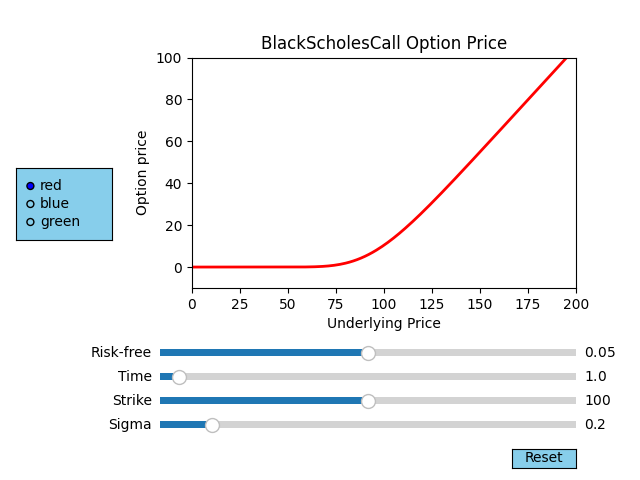

In [41]:
BlackScholesPricing(BlackScholesCall)

# Bachelier Model

In [42]:
def BachelierPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, sigma, T), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 10])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, sigma=sigma_slider.val, T=time_slider.val))
        fig.canvas.draw_idle()
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Add a set of radio buttons for changing color
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

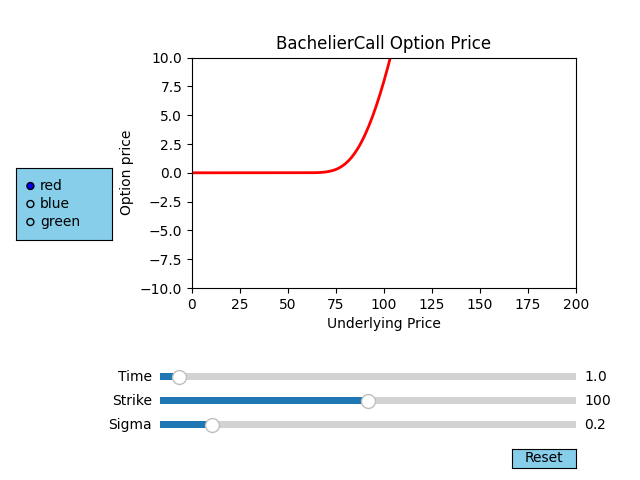

In [43]:
BachelierPricing(BachelierCall)

# Displaced-Diffusion Model

In [44]:
def DisplacedDiffusionPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, r, sigma, T, beta), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-2, 2])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed
    
    # Draw another slider
    beta_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03], facecolor=axis_color)
    beta_slider = Slider(beta_slider_ax, 'Beta', 0.1, 0.9, valinit=beta)             #range for beta to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val, beta=beta_slider.val))
        fig.canvas.draw_idle()
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    beta_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        beta_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Add a set of radio buttons for changing color
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

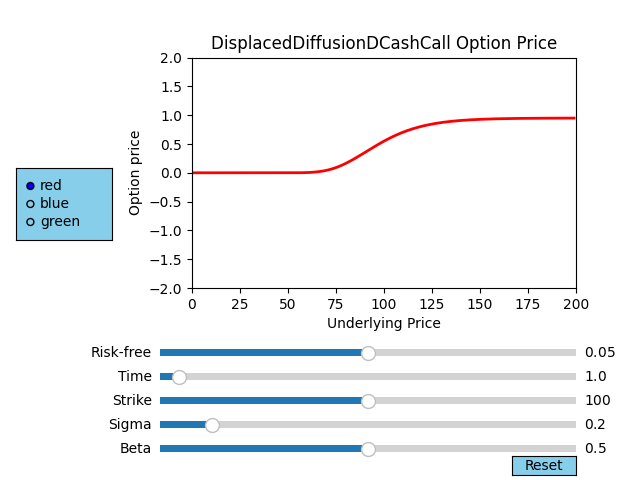

In [56]:
DisplacedDiffusionPricing(DisplacedDiffusionDCashCall)

# Greeks

This only works on Black Scholes Model with d1 and d2

In [46]:
def GreekSensitivity(model,greek,ylim):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, greek(K, r, sigma, T), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim(ylim)                                #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel(f"{greek.__name__}")
    ax.set_title(f"Change in {greek.__name__} for {model.__name__}")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(greek(K=strike_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val))
        fig.canvas.draw_idle()
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Add a set of radio buttons for changing color
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

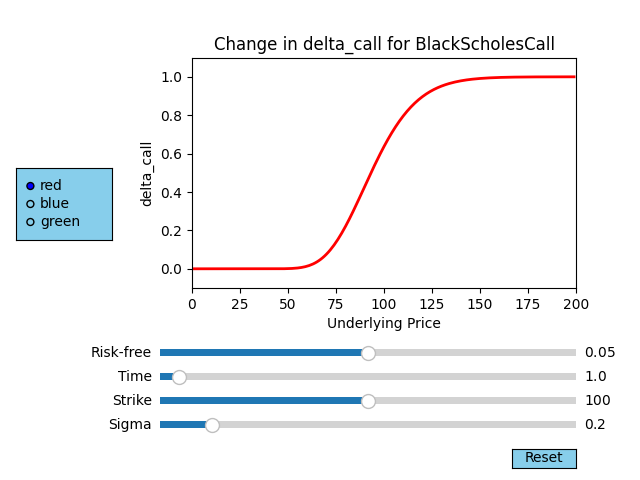

In [47]:
GreekSensitivity(model=BlackScholesCall,greek=delta_call,ylim=[-0.1, 1.1])

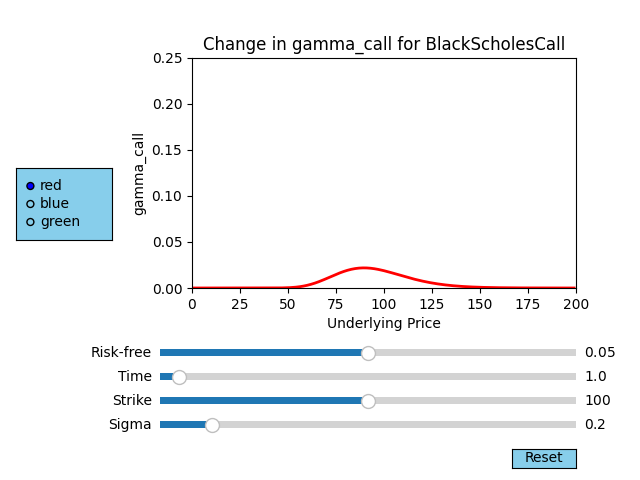

In [48]:
GreekSensitivity(model=BlackScholesCall,greek=gamma_call,ylim=[0, 0.25])

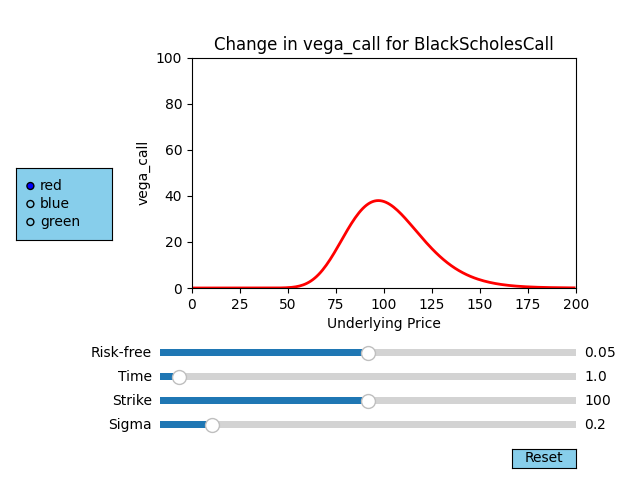

In [49]:
GreekSensitivity(model=BlackScholesCall,greek=vega_call,ylim=[0, 100])

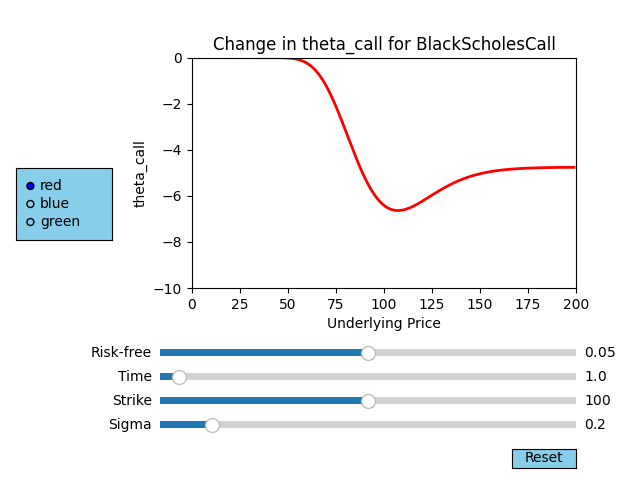

In [54]:
GreekSensitivity(model=BlackScholesCall,greek=theta_call,ylim=[-10, 0])

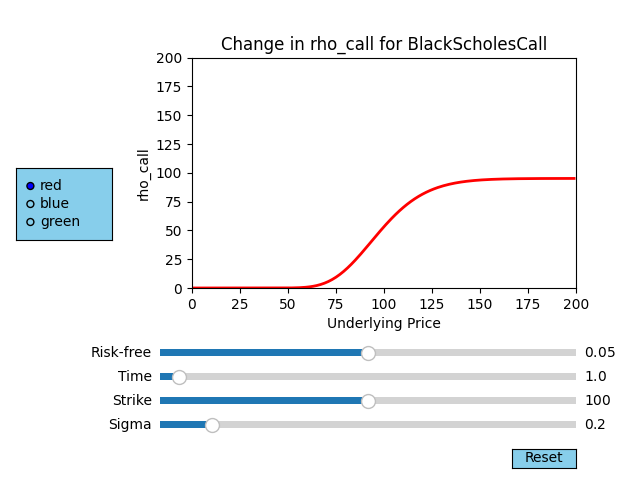

In [51]:
GreekSensitivity(model=BlackScholesCall,greek=rho_call,ylim=[0, 200])

In [52]:
'''

axis_color = 'skyblue'

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.30, bottom=0.40)

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(S, BlackScholesCall(K, r, sigma, T), linewidth=2, color='red')
ax.set_xlim([0, 200])
ax.set_ylim([-10, 100])
ax.set_xlabel('Underlying Price')
ax.set_ylabel('Option price')
ax.set_title('Black Scholes Call Option Price')


# Add four sliders for tweaking the parameters

# Define an axes area and draw a slider in it

rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)

# Draw another slider
time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

# Draw another slider
strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)

# Draw another slider
sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.0, 0.9, valinit=sigma)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(BlackScholesCall(K=strike_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val))
    fig.canvas.draw_idle()
rf_slider.on_changed(sliders_on_changed)
time_slider.on_changed(sliders_on_changed)
strike_slider.on_changed(sliders_on_changed)
sigma_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    rf_slider.reset()
    time_slider.reset()
    strike_slider.reset()
    sigma_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()

'''

"\n\naxis_color = 'skyblue'\n\nfig = plt.figure()\nax = fig.add_subplot(111)\n\n# Adjust the subplots region to leave some space for the sliders and buttons\nfig.subplots_adjust(left=0.30, bottom=0.40)\n\n# Draw the initial plot\n# The 'line' variable is used for modifying the line later\n[line] = ax.plot(S, BlackScholesCall(K, r, sigma, T), linewidth=2, color='red')\nax.set_xlim([0, 200])\nax.set_ylim([-10, 100])\nax.set_xlabel('Underlying Price')\nax.set_ylabel('Option price')\nax.set_title('Black Scholes Call Option Price')\n\n\n# Add four sliders for tweaking the parameters\n\n# Define an axes area and draw a slider in it\n\nrf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)\nrf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)\n\n# Draw another slider\ntime_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)\ntime_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)\n\n# Draw another slider\nstrike_slider_ax  = 